In [1]:
import pandas as pd
import numpy as np
import datetime
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, cohen_kappa_score, f1_score, precision_score, recall_score, roc_curve

# Loading of data file

In [2]:
feat_file=pd.read_csv('cancer_preprocess.csv')

In [3]:
feat_file.head()

,A1_0,A1_1,A1_2,A1_3,A1_4,A1_5,A1_6,A1_7,A1_8,A1_9,...,E5_118,E5_119,E5_120,E5_121,E5_122,E5_123,E5_124,E5_125,E5_126,E5_127
0,0.183793,0.239916,0.850030,0.210690,0.896150,0.866617,0.860076,0.115359,0.374133,0.927302,...,0.793461,0.576311,0.189772,0.784201,0.335585,0.644900,0.301631,0.547792,0.479534,0.308149
1,0.908285,0.882967,0.804499,0.167710,0.854424,0.773797,0.818178,0.146237,0.822128,0.880442,...,0.792318,0.645596,0.668128,0.267654,0.732278,0.791278,0.680896,0.315371,0.368137,0.192646
2,0.187789,0.896291,0.089300,0.872091,0.140625,0.809294,0.833710,0.439762,0.836772,0.120445,...,0.594850,0.744443,0.246511,0.767050,0.736697,0.710731,0.586913,0.777560,0.706049,0.311375
3,0.911319,0.907869,0.831656,0.767504,0.886981,0.589135,0.704022,0.613958,0.852084,0.481431,...,0.593676,0.227899,0.264702,0.535805,0.480239,0.731689,0.799642,0.856727,0.824530,0.582091
4,0.181163,0.800212,0.827693,0.149731,0.739144,0.843704,0.841885,0.127548,0.112236,0.898438,...,0.391759,0.808125,0.147298,0.859803,0.620034,0.734427,0.126441,0.508898,0.552177,0.360427


In [4]:
feat_file.shape

(2129, 3200)

In [5]:
X=feat_file.values

In [6]:
label= pd.read_csv('cancer_label.csv')
label.head()

,Status
0,0
1,0
2,0
3,1
4,0


In [7]:
y=label.values.ravel()

# split


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [9]:
X_train.shape

(1703, 3200)

In [10]:
y_train.shape

(1703,)

# boruta

In [11]:
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)


In [12]:
from boruta import BorutaPy

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(X_train, y_train)

# check selected features
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_train_filtered = feat_selector.transform(X_train)
X_test_filtered = feat_selector.transform(X_test)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	3200
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	3200
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	3200
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	3200
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	3200
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	3200
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	3200
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	776
Rejected: 	2424
Iteration: 	9 / 100
Confirmed: 	158
Tentative: 	618
Rejected: 	2424
Iteration: 	10 / 100
Confirmed: 	158
Tentative: 	618
Rejected: 	2424
Iteration: 	11 / 100
Confirmed: 	158
Tentative: 	618
Rejected: 	2424
Iteration: 	12 / 100
Confirmed: 	176
Tentative: 	413
Rejected: 	2611
Iteration: 	13 / 100
Confirmed: 	176
Tentative: 	413
Rejected: 	2611
Iteration: 	14 / 100
Confirmed: 	176
Tentative: 	413
Rejected: 	2611
Iteration: 	15 / 100
Confirmed: 	176
Tentative: 	413
Rejected: 	2611
Iter

In [13]:
X_train_filtered.shape

(1703, 237)

In [14]:
y_train.shape

(1703,)

In [15]:
selected_feat_indices = np.where(feat_selector.support_ == True)[0]

In [16]:
selected_feat_indices

array([ 136,  151,  243,  253,  268,  421,  427,  430,  459,  468,  485,
        492,  510,  549,  588,  608,  641,  642,  656,  657,  680,  684,
        689,  698,  720,  724,  733,  747,  795,  849,  889,  911,  974,
       1047, 1059, 1064, 1072, 1089, 1095, 1107, 1112, 1114, 1116, 1121,
       1123, 1124, 1129, 1130, 1138, 1140, 1150, 1186, 1189, 1197, 1228,
       1240, 1246, 1255, 1256, 1284, 1288, 1289, 1290, 1292, 1295, 1296,
       1298, 1299, 1301, 1305, 1306, 1307, 1314, 1318, 1320, 1323, 1325,
       1327, 1330, 1332, 1335, 1337, 1344, 1345, 1346, 1361, 1363, 1364,
       1365, 1368, 1370, 1375, 1377, 1382, 1385, 1386, 1388, 1399, 1402,
       1403, 1508, 1547, 1664, 1683, 1719, 1727, 1728, 1772, 1789, 1836,
       1837, 1879, 1890, 1986, 2014, 2051, 2054, 2055, 2056, 2067, 2077,
       2081, 2082, 2083, 2086, 2094, 2099, 2101, 2104, 2116, 2118, 2138,
       2139, 2153, 2165, 2168, 2169, 2181, 2230, 2243, 2244, 2254, 2265,
       2278, 2281, 2301, 2332, 2351, 2370, 2402, 24

In [17]:
selected_feat_names = list(feat_file.columns[selected_feat_indices])

In [18]:
selected_feat_names

['A2_8',
 'A2_23',
 'A2_115',
 'A2_125',
 'A3_12',
 'A4_37',
 'A4_43',
 'A4_46',
 'A4_75',
 'A4_84',
 'A4_101',
 'A4_108',
 'A4_126',
 'A5_37',
 'A5_76',
 'A5_96',
 'B1_1',
 'B1_2',
 'B1_16',
 'B1_17',
 'B1_40',
 'B1_44',
 'B1_49',
 'B1_58',
 'B1_80',
 'B1_84',
 'B1_93',
 'B1_107',
 'B2_27',
 'B2_81',
 'B2_121',
 'B3_15',
 'B3_78',
 'B4_23',
 'B4_35',
 'B4_40',
 'B4_48',
 'B4_65',
 'B4_71',
 'B4_83',
 'B4_88',
 'B4_90',
 'B4_92',
 'B4_97',
 'B4_99',
 'B4_100',
 'B4_105',
 'B4_106',
 'B4_114',
 'B4_116',
 'B4_126',
 'B5_34',
 'B5_37',
 'B5_45',
 'B5_76',
 'B5_88',
 'B5_94',
 'B5_103',
 'B5_104',
 'C1_4',
 'C1_8',
 'C1_9',
 'C1_10',
 'C1_12',
 'C1_15',
 'C1_16',
 'C1_18',
 'C1_19',
 'C1_21',
 'C1_25',
 'C1_26',
 'C1_27',
 'C1_34',
 'C1_38',
 'C1_40',
 'C1_43',
 'C1_45',
 'C1_47',
 'C1_50',
 'C1_52',
 'C1_55',
 'C1_57',
 'C1_64',
 'C1_65',
 'C1_66',
 'C1_81',
 'C1_83',
 'C1_84',
 'C1_85',
 'C1_88',
 'C1_90',
 'C1_95',
 'C1_97',
 'C1_102',
 'C1_105',
 'C1_106',
 'C1_108',
 'C1_119',
 'C1_1

In [19]:
train_x = pd.DataFrame(X_train)
test_x = pd.DataFrame(X_test)

In [20]:
train_x.columns=feat_file.columns
test_x.columns=feat_file.columns

In [21]:
new_df=train_x.loc[:,selected_feat_names]
X_train_filtered=new_df

new_df_test=test_x.loc[:,selected_feat_names]
X_test_filtered=new_df_test

# Boruta+ActiveSVM

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

In [23]:
import numpy as np
import time
import random
import os

from sklearn.preprocessing import normalize 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from matplotlib import gridspec

from activeSVC import min_complexity, min_acquisition,min_complexity_cv, min_acquisition_cv,min_complexity_h5py, min_acquisition_h5py
import pandas as pd
import pickle
import os, psutil

In [24]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.utils import class_weight
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.utils import class_weight
from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import iterative_train_test_split
import pickle
from keras.layers import Dense, Activation, Dropout, BatchNormalization, Input
from keras.models import Sequential, Model
from keras import optimizers, regularizers, initializers
from keras.callbacks import ModelCheckpoint, Callback
from keras import backend as K
from keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

2023-04-24 13:15:13.439188: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 13:15:14.045238: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [25]:
def text_create(path, name, msg):
    full_path = path + "/" + name + '.pickle'
    f=open(full_path,'wb') 
    pickle.dump(msg,f)
    f.close()

class TimerError(Exception):
     """A custom exception used to report errors in use of Timer class"""

class Timer:
    def __init__(self):
        self._start_time = None

    def start(self):
        if self._start_time is not None:
            raise TimerError(f"Timer is running. Use .stop() to stop it")

        self._start_time = time.perf_counter()

    def stop(self):
        if self._start_time is None:
            raise TimerError(f"Timer is not running. Use .start() to start it")

        elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None
        print(f"Total run time: {elapsed_time:0.4f} seconds")
        return elapsed_time

In [26]:
print(np.shape(X_train_filtered))
print(np.shape(y_train))
print(np.shape(X_test_filtered))
print(np.shape(y_test))

(1703, 237)
(1703,)
(426, 237)
(426,)


In [27]:
'''
Parameters
'''
num_features = 20
num_samples=100
init_samples=200

if __name__ == '__main__':

    t=Timer()
    t.start()
    feature_selected, num_samples_list, samples_global, train_errors,test_errors,train_scores,test_scores,step_times= min_acquisition(
       X_train_filtered.values,y_train,X_test_filtered.values,y_test,num_features=num_features,num_samples=num_samples, init_samples=init_samples)
    elapsed_time=t.stop()

Elapsed time: 0.6275 seconds
feature 0 : gene [143]  200 samples
training error=0.4445096887844979 test error=0.43896713615023475
training accuracy=0.5554903112155021 test accuracy=0.5610328638497653
Elapsed time: 0.9740 seconds
feature 1 : gene 16  234 samples
training error=0.4345273047563124 test error=0.4014084507042254
training accuracy=0.5654726952436876 test accuracy=0.5985915492957746
Elapsed time: 0.8784 seconds
feature 2 : gene 212  239 samples
training error=0.38813857897827364 test error=0.4014084507042254
training accuracy=0.6118614210217264 test accuracy=0.5985915492957746
Elapsed time: 1.0399 seconds
feature 3 : gene 102  256 samples
training error=0.37522019964768055 test error=0.38967136150234744
training accuracy=0.6247798003523194 test accuracy=0.6103286384976526
Elapsed time: 1.0177 seconds
feature 4 : gene 165  266 samples
training error=0.3534938344098649 test error=0.3826291079812207
training accuracy=0.6465061655901351 test accuracy=0.6173708920187794
Elapsed ti

In [28]:
feature_selected

[143,
 16,
 212,
 102,
 165,
 110,
 182,
 18,
 27,
 43,
 140,
 29,
 141,
 6,
 193,
 228,
 20,
 174,
 22,
 49]

In [29]:
selected_feat_names = list(X_train_filtered.columns[feature_selected])

In [30]:
selected_feat_names

['D3_102',
 'B1_1',
 'E4_84',
 'C4_0',
 'E1_56',
 'C5_45',
 'E3_97',
 'B1_16',
 'B1_107',
 'B4_97',
 'D3_68',
 'B2_81',
 'D3_78',
 'A4_43',
 'E4_28',
 'E4_113',
 'B1_40',
 'E2_52',
 'B1_49',
 'B4_116']

In [31]:
new_df = X_train_filtered.loc[:,selected_feat_names]

In [32]:
new_test=X_test_filtered.loc[:,selected_feat_names]

In [33]:
new_df.to_csv('sequential_train_signaturizer.csv',index=False)
new_test.to_csv('sequential_test_signaturizer.csv',index=False)

In [34]:
X_train_filtered=new_df
X_test_filtered=new_test

In [35]:
X_train_filtered.shape

(1703, 20)

In [36]:
X_test_filtered.shape

(426, 20)

In [37]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

In [38]:
km = KMeans(n_clusters=2, random_state=42)
#Fit the KMeans model
km.fit_predict(X_train_filtered)
y_pred = km.labels_

In [39]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_train_filtered,y_train, metric='euclidean')
ari = adjusted_rand_score(y_train, y_pred)
nmi = normalized_mutual_info_score(y_train, y_pred)

In [40]:
data = pd.DataFrame({'Clustering_scores': ['silhouette_score', 'adjusted_rand_score', 'normalized_mutual_info_score'],
        'Scores':[score,ari,nmi]})

In [41]:
data

,Clustering_scores,Scores
0,silhouette_score,0.025644
1,adjusted_rand_score,0.070184
2,normalized_mutual_info_score,0.055115


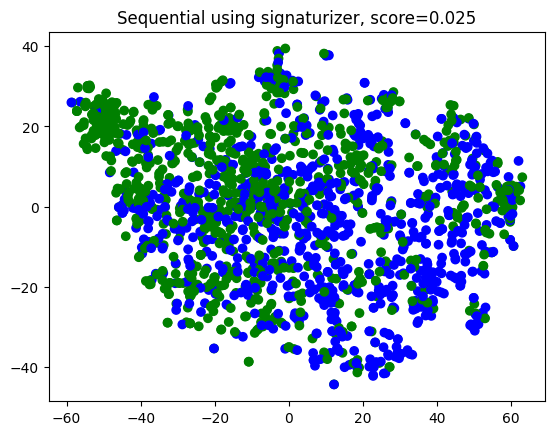

In [42]:
# Use t-SNE to reduce dimensionality of data to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X_train_filtered)
colors = ['blue', 'green']  # red for cluster 0, grey for cluster 1
cmap = ListedColormap(colors)

#plt.legend()

# Plot t-SNE reduced data points colored by cluster label
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train,cmap=cmap)
plt.title('Sequential using signaturizer, score=0.025')
plt.show()

## RFC

In [43]:
#define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train_filtered,y_train)
end=datetime.datetime.now()

y_pred_train=forest.predict(X_train_filtered)
y_pred_test=forest.predict(X_test_filtered)
y_prediction_values_train=forest.predict_proba(X_train_filtered)
y_prediction_values_test=forest.predict_proba(X_test_filtered)

In [44]:
rfc_acc_train=accuracy_score(y_train,y_pred_train)*100
rfc_acc_test=accuracy_score(y_test,y_pred_test)*100
rfc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
rfc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
rfc_f1_train=f1_score(y_train, y_pred_train, average='macro')
rfc_f1_test=f1_score(y_test, y_pred_test, average='macro')
rfc_prec_train=precision_score(y_train, y_pred_train)
rfc_prec_test=precision_score(y_test, y_pred_test)
rfc_recall_train=recall_score(y_train, y_pred_train)
rfc_recall_test=recall_score(y_test, y_pred_test)
kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
rfc_kappa_train=kappa_train
kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
rfc_kappa_test=kappa_test

rfc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
rfc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[126  73]
 [ 72 155]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6364    0.6332    0.6348       199
           1     0.6798    0.6828    0.6813       227

    accuracy                         0.6596       426
   macro avg     0.6581    0.6580    0.6580       426
weighted avg     0.6595    0.6596    0.6596       426



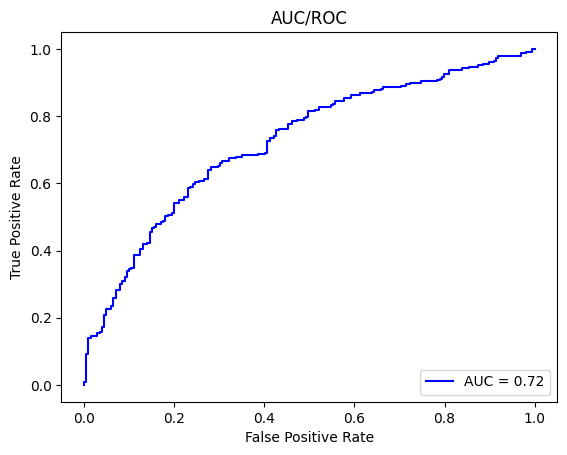

In [45]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_1=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train_filtered,y_train)
y_pred_test=KNN.predict(X_test_filtered)
y_pred_train=KNN.predict(X_train_filtered)


y_prediction_values_train=KNN.predict_proba(X_train_filtered)
y_prediction_values_test=KNN.predict_proba(X_test_filtered)


In [47]:
knn_acc_train=accuracy_score(y_train,y_pred_train)*100
knn_acc_test=accuracy_score(y_test,y_pred_test)*100
knn_mcc_train=matthews_corrcoef(y_train, y_pred_train)
knn_mcc_test=matthews_corrcoef(y_test, y_pred_test)
knn_f1_train=f1_score(y_train, y_pred_train, average='macro')
knn_f1_test=f1_score(y_test, y_pred_test, average='macro')
knn_prec_train=precision_score(y_train, y_pred_train)
knn_prec_test=precision_score(y_test, y_pred_test)
knn_recall_train=recall_score(y_train, y_pred_train)
knn_recall_test=recall_score(y_test, y_pred_test)
knn_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

knn_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

knn_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
knn_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[129  70]
 [ 76 151]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6293    0.6482    0.6386       199
           1     0.6833    0.6652    0.6741       227

    accuracy                         0.6573       426
   macro avg     0.6563    0.6567    0.6564       426
weighted avg     0.6580    0.6573    0.6575       426



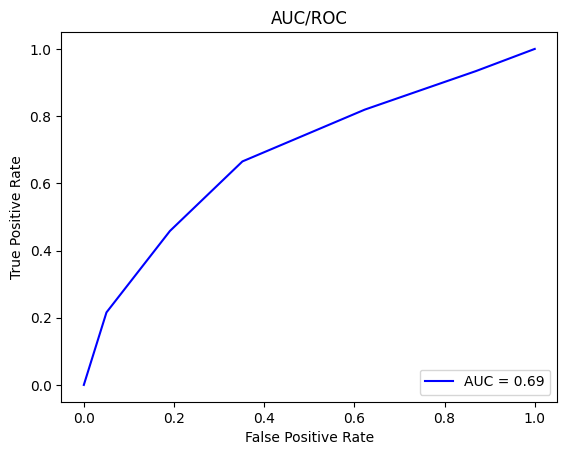

In [48]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_2=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# SVC

In [49]:
from sklearn.svm import SVC
model=SVC(probability=True)
model.fit(X_train_filtered,y_train)
y_pred_test=model.predict(X_test_filtered)
y_pred_train=model.predict(X_train_filtered)

y_prediction_values_train=model.predict_proba(X_train_filtered)
y_prediction_values_test=model.predict_proba(X_test_filtered)

In [50]:
svc_acc_train=accuracy_score(y_train,y_pred_train)*100
svc_acc_test=accuracy_score(y_test,y_pred_test)*100
svc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
svc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
svc_f1_train=f1_score(y_train, y_pred_train, average='macro')
svc_f1_test=f1_score(y_test, y_pred_test, average='macro')
svc_prec_train=precision_score(y_train, y_pred_train)
svc_prec_test=precision_score(y_test, y_pred_test)
svc_recall_train=recall_score(y_train, y_pred_train)
svc_recall_test=recall_score(y_test, y_pred_test)
svc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

svc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)


svc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
svc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[119  80]
 [ 69 158]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6330    0.5980    0.6150       199
           1     0.6639    0.6960    0.6796       227

    accuracy                         0.6502       426
   macro avg     0.6484    0.6470    0.6473       426
weighted avg     0.6494    0.6502    0.6494       426



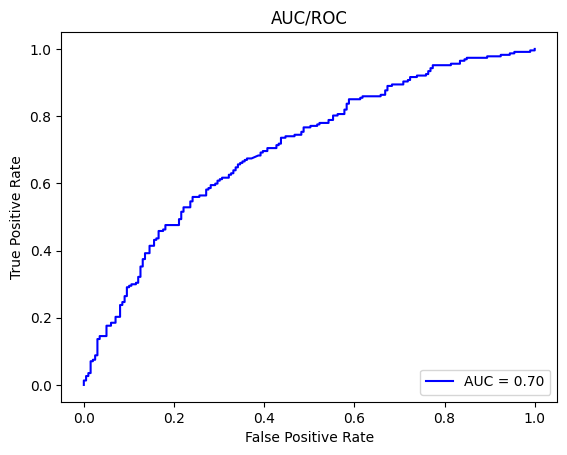

In [51]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_3=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_filtered,y_train)
y_pred_test=lr.predict(X_test_filtered)
y_pred_train=lr.predict(X_train_filtered)

y_prediction_values_train=lr.predict_proba(X_train_filtered)
y_prediction_values_test=lr.predict_proba(X_test_filtered)                                     

In [53]:
lr_acc_train=accuracy_score(y_train,y_pred_train)*100
lr_acc_test=accuracy_score(y_test,y_pred_test)*100
lr_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lr_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lr_f1_train=f1_score(y_train, y_pred_train, average='macro')
lr_f1_test=f1_score(y_test, y_pred_test, average='macro')
lr_prec_train=precision_score(y_train, y_pred_train)
lr_prec_test=precision_score(y_test, y_pred_test)
lr_recall_train=recall_score(y_train, y_pred_train)
lr_recall_test=recall_score(y_test, y_pred_test)
lr_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

lr_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

lr_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
lr_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[117  82]
 [ 73 154]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6158    0.5879    0.6015       199
           1     0.6525    0.6784    0.6652       227

    accuracy                         0.6362       426
   macro avg     0.6342    0.6332    0.6334       426
weighted avg     0.6354    0.6362    0.6355       426



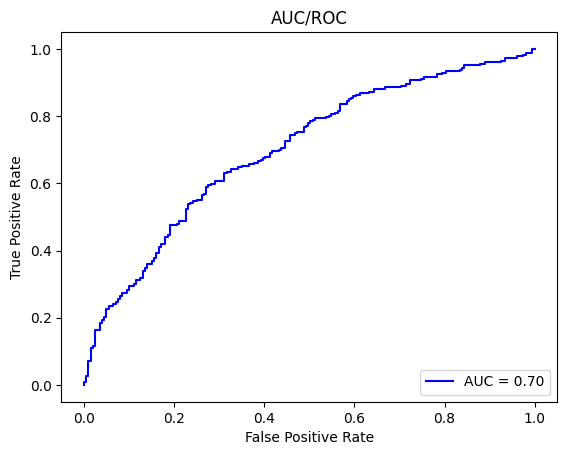

In [54]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_4=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# XGB

In [55]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',silent=True, nthread=1)
xgb.fit(X_train_filtered, y_train)
y_pred_train = xgb.predict(X_train_filtered)
y_pred_test = xgb.predict(X_test_filtered)

y_prediction_values_train=xgb.predict_proba(X_train_filtered)
y_prediction_values_test=xgb.predict_proba(X_test_filtered)

[13:22:25] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [56]:
xgb_acc_train=accuracy_score(y_train,y_pred_train)*100
xgb_acc_test=accuracy_score(y_test,y_pred_test)*100
xgb_mcc_train=matthews_corrcoef(y_train, y_pred_train)
xgb_mcc_test=matthews_corrcoef(y_test, y_pred_test)
xgb_f1_train=f1_score(y_train, y_pred_train, average='macro')
xgb_f1_test=f1_score(y_test, y_pred_test, average='macro')
xgb_prec_train=precision_score(y_train, y_pred_train)
xgb_prec_test=precision_score(y_test, y_pred_test)
xgb_recall_train=recall_score(y_train, y_pred_train)
xgb_recall_test=recall_score(y_test, y_pred_test)

xgb_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

xgb_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)



xgb_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
xgb_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[115  84]
 [ 71 156]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6183    0.5779    0.5974       199
           1     0.6500    0.6872    0.6681       227

    accuracy                         0.6362       426
   macro avg     0.6341    0.6326    0.6327       426
weighted avg     0.6352    0.6362    0.6351       426



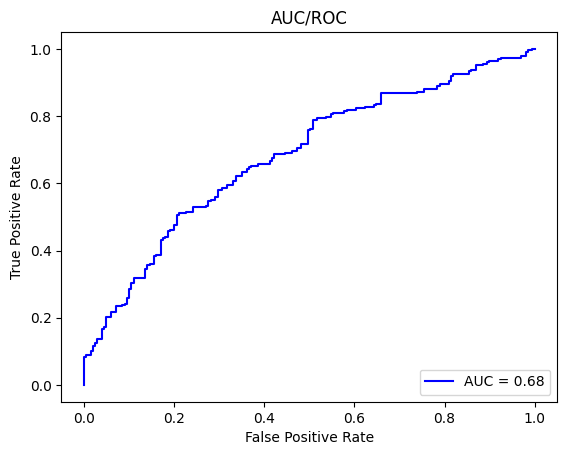

In [57]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_5=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Gaussian NB

In [58]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_filtered, y_train)

y_pred_train = clf.predict(X_train_filtered)
y_pred_test = clf.predict(X_test_filtered)
y_prediction_values_train=clf.predict_proba(X_train_filtered)
y_prediction_values_test=clf.predict_proba(X_test_filtered)

In [59]:
clf_acc_train=accuracy_score(y_train,y_pred_train)*100
clf_acc_test=accuracy_score(y_test,y_pred_test)*100
clf_mcc_train=matthews_corrcoef(y_train, y_pred_train)
clf_mcc_test=matthews_corrcoef(y_test, y_pred_test)
clf_f1_train=f1_score(y_train, y_pred_train, average='macro')
clf_f1_test=f1_score(y_test, y_pred_test, average='macro')
clf_prec_train=precision_score(y_train, y_pred_train)
clf_prec_test=precision_score(y_test, y_pred_test)
clf_recall_train=recall_score(y_train, y_pred_train)
clf_recall_test=recall_score(y_test, y_pred_test)
clf_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

clf_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

clf_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
clf_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[106  93]
 [ 64 163]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6235    0.5327    0.5745       199
           1     0.6367    0.7181    0.6749       227

    accuracy                         0.6315       426
   macro avg     0.6301    0.6254    0.6247       426
weighted avg     0.6306    0.6315    0.6280       426



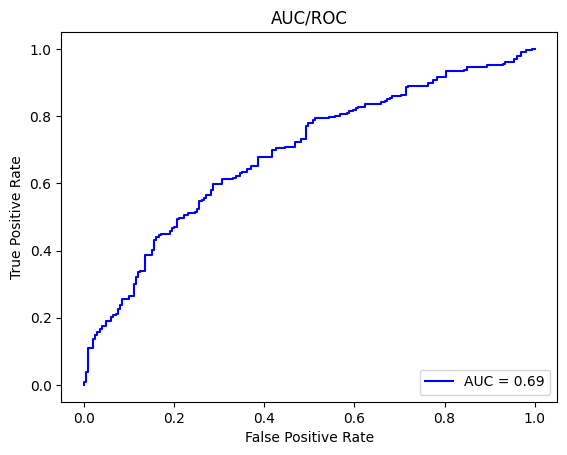

In [60]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_6=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## MLP

In [61]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train_filtered, y_train)

y_pred_train = mlp.predict(X_train_filtered)
y_pred_test = mlp.predict(X_test_filtered)
y_prediction_values_train=mlp.predict_proba(X_train_filtered)
y_prediction_values_test=mlp.predict_proba(X_test_filtered)

In [62]:
mlp_acc_train=accuracy_score(y_train,y_pred_train)*100
mlp_acc_test=accuracy_score(y_test,y_pred_test)*100
mlp_mcc_train=matthews_corrcoef(y_train, y_pred_train)
mlp_mcc_test=matthews_corrcoef(y_test, y_pred_test)
mlp_f1_train=f1_score(y_train, y_pred_train, average='macro')
mlp_f1_test=f1_score(y_test, y_pred_test, average='macro')
mlp_prec_train=precision_score(y_train, y_pred_train)
mlp_prec_test=precision_score(y_test, y_pred_test)
mlp_recall_train=recall_score(y_train, y_pred_train)
mlp_recall_test=recall_score(y_test, y_pred_test)

mlp_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

mlp_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)


mlp_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
mlp_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[131  68]
 [ 91 136]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5901    0.6583    0.6223       199
           1     0.6667    0.5991    0.6311       227

    accuracy                         0.6268       426
   macro avg     0.6284    0.6287    0.6267       426
weighted avg     0.6309    0.6268    0.6270       426



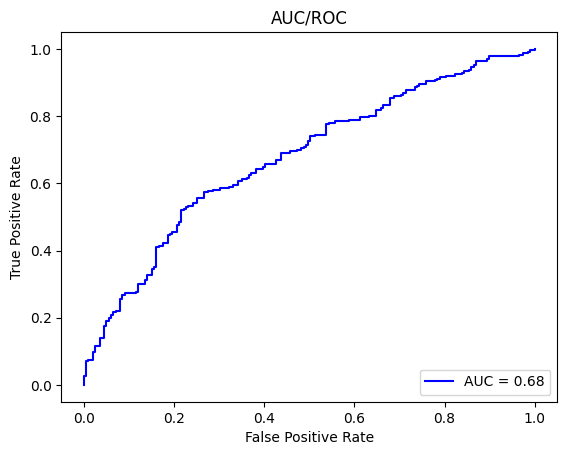

In [63]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_7=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Extratree classifier

In [64]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
etc.fit(X_train_filtered, y_train)


y_pred_train = etc.predict(X_train_filtered)
y_pred_test = etc.predict(X_test_filtered)
y_prediction_values_train=etc.predict_proba(X_train_filtered)
y_prediction_values_test=etc.predict_proba(X_test_filtered)

In [65]:
etc_acc_train=accuracy_score(y_train,y_pred_train)*100
etc_acc_test=accuracy_score(y_test,y_pred_test)*100
etc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
etc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
etc_f1_train=f1_score(y_train, y_pred_train, average='macro')
etc_f1_test=f1_score(y_test, y_pred_test, average='macro')
etc_prec_train=precision_score(y_train, y_pred_train)
etc_prec_test=precision_score(y_test, y_pred_test)
etc_recall_train=recall_score(y_train, y_pred_train)
etc_recall_test=recall_score(y_test, y_pred_test)

etc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

etc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

etc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
etc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])


print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[124  75]
 [ 70 157]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6392    0.6231    0.6310       199
           1     0.6767    0.6916    0.6841       227

    accuracy                         0.6596       426
   macro avg     0.6579    0.6574    0.6576       426
weighted avg     0.6592    0.6596    0.6593       426



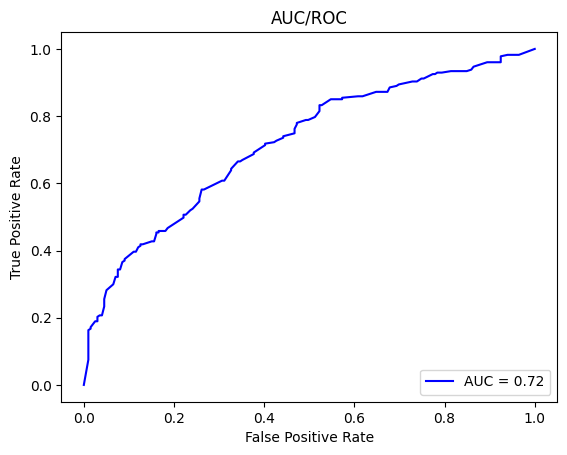

In [66]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_8=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Decision Tree classifier

In [67]:
## Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)
dtc.fit(X_train_filtered, y_train)


y_pred_train = dtc.predict(X_train_filtered)
y_pred_test = dtc.predict(X_test_filtered)

y_prediction_values_train=dtc.predict_proba(X_train_filtered)
y_prediction_values_test=dtc.predict_proba(X_test_filtered)                           

In [68]:
dtc_acc_train=accuracy_score(y_train,y_pred_train)*100
dtc_acc_test=accuracy_score(y_test,y_pred_test)*100
dtc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
dtc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
dtc_f1_train=f1_score(y_train, y_pred_train, average='macro')
dtc_f1_test=f1_score(y_test, y_pred_test, average='macro')
dtc_prec_train=precision_score(y_train, y_pred_train)
dtc_prec_test=precision_score(y_test, y_pred_test)
dtc_recall_train=recall_score(y_train, y_pred_train)
dtc_recall_test=recall_score(y_test, y_pred_test)

dtc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

dtc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

dtc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
dtc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[ 86 113]
 [ 68 159]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5584    0.4322    0.4873       199
           1     0.5846    0.7004    0.6373       227

    accuracy                         0.5751       426
   macro avg     0.5715    0.5663    0.5623       426
weighted avg     0.5724    0.5751    0.5672       426



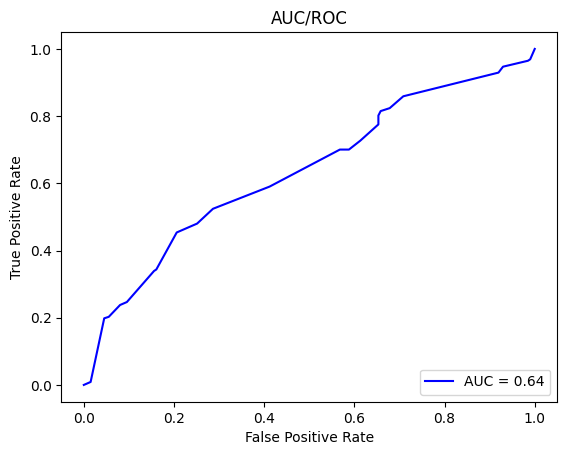

In [69]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_9=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## LDA

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_filtered, y_train)


y_pred_train =lda.predict(X_train_filtered)
y_pred_test = lda.predict(X_test_filtered)

y_prediction_values_train=lda.predict_proba(X_train_filtered)
y_prediction_values_test=lda.predict_proba(X_test_filtered)
                                                        

In [71]:
lda_acc_train=accuracy_score(y_train,y_pred_train)*100
lda_acc_test=accuracy_score(y_test,y_pred_test)*100
lda_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lda_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lda_f1_train=f1_score(y_train, y_pred_train, average='macro')
lda_f1_test=f1_score(y_test, y_pred_test, average='macro')
lda_prec_train=precision_score(y_train, y_pred_train)
lda_prec_test=precision_score(y_test, y_pred_test)
lda_recall_train=recall_score(y_train, y_pred_train)
lda_recall_test=recall_score(y_test, y_pred_test)

lda_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

lda_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)


lda_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
lda_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[116  83]
 [ 70 157]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6237    0.5829    0.6026       199
           1     0.6542    0.6916    0.6724       227

    accuracy                         0.6408       426
   macro avg     0.6389    0.6373    0.6375       426
weighted avg     0.6399    0.6408    0.6398       426



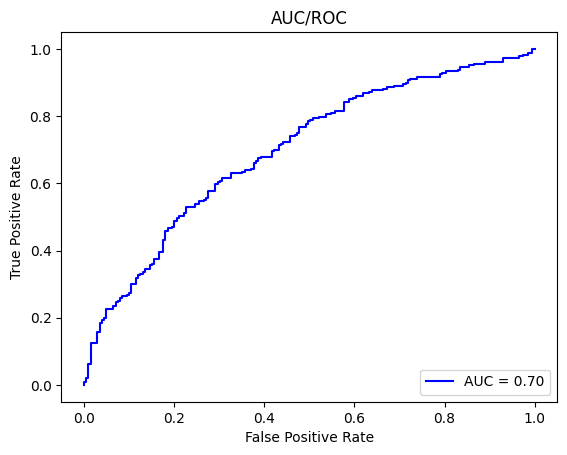

In [72]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_10=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

In [73]:
data_train = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
         'Accuracy_train':[rfc_acc_train,knn_acc_train,svc_acc_train,lr_acc_train,xgb_acc_train,clf_acc_train,mlp_acc_train,etc_acc_train,dtc_acc_train,lda_acc_train],
       'MCC Score_train':[rfc_mcc_train,knn_mcc_train,svc_mcc_train,lr_mcc_train,xgb_mcc_train,clf_mcc_train,mlp_mcc_train,etc_mcc_train,dtc_mcc_train,lda_mcc_train],
       'F1 Score_train':[rfc_f1_train,knn_f1_train,svc_f1_train,lr_f1_train,xgb_f1_train,clf_f1_train,mlp_f1_train,etc_f1_train,dtc_f1_train,lda_f1_train],
       'Precision_train':[rfc_prec_train,knn_prec_train,svc_prec_train,lr_prec_train,xgb_prec_train,clf_prec_train,mlp_prec_train,etc_prec_train,dtc_prec_train,lda_prec_train],
       'Recall_train':[rfc_recall_train,knn_recall_train,svc_recall_train,lr_recall_train,xgb_recall_train,clf_recall_train,mlp_recall_train,etc_recall_train,dtc_recall_train,lda_recall_train],
         'kappa Score_train':[rfc_kappa_train,knn_kappa_train,svc_kappa_train,lr_kappa_train,xgb_kappa_train,clf_kappa_train,mlp_kappa_train,etc_kappa_train,dtc_kappa_train,lda_kappa_train],
       'AUC/ROC_train':[rfc_auc_train,knn_auc_train,svc_auc_train,lr_auc_train,xgb_auc_train,clf_auc_train,mlp_auc_train,etc_auc_train,dtc_auc_train,lda_auc_train]}
df_train = pd.DataFrame(data_train)

In [74]:
data_test = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
             'Accuracy_test': [rfc_acc_test,knn_acc_test,svc_acc_test,lr_acc_test,xgb_acc_test,clf_acc_test,mlp_acc_test,etc_acc_test,dtc_acc_test,lda_acc_test],
             'MCC Score_test':[rfc_mcc_test,knn_mcc_test,svc_mcc_test,lr_mcc_test,xgb_mcc_test,clf_mcc_test,mlp_mcc_test,etc_mcc_test,dtc_mcc_test,lda_mcc_test],
              'F1 Score_test':[rfc_f1_test,knn_f1_test,svc_f1_test,lr_f1_test,xgb_f1_test,clf_f1_test,mlp_f1_test,etc_f1_test,dtc_f1_test,lda_f1_test],
               'Precision_test':[rfc_prec_test,knn_prec_test,svc_prec_test,lr_prec_test,xgb_prec_test,clf_prec_test,mlp_prec_test,etc_prec_test,dtc_prec_test,lda_prec_test],
             'Recall_test':[rfc_recall_test,knn_recall_test,svc_recall_test,lr_recall_test,xgb_recall_test,clf_recall_test,mlp_recall_test,etc_recall_test,dtc_recall_test,lda_recall_test],
              'kappa Score_test':[rfc_kappa_test,knn_kappa_test,svc_kappa_test,lr_kappa_test,xgb_kappa_test,clf_kappa_test,mlp_kappa_test,etc_kappa_test,dtc_kappa_test,lda_kappa_test],
               'AUC/ROC_test':[rfc_auc_test,knn_auc_test,svc_auc_test,lr_auc_test,xgb_auc_test,clf_auc_test,mlp_auc_test,etc_auc_test,dtc_auc_test,lda_auc_test]}
             
df_test = pd.DataFrame(data_test)             

In [75]:
df_train

,Model,Accuracy_train,MCC Score_train,F1 Score_train,Precision_train,Recall_train,kappa Score_train,AUC/ROC_train
0,RFC,78.038755,0.560679,0.779550,0.770140,0.817560,0.559544,0.883384
1,KNN,78.097475,0.561886,0.780123,0.770386,0.818700,0.560706,0.865359
2,SVC,78.273635,0.566578,0.781362,0.763788,0.836944,0.563793,0.863116
3,LR,67.938931,0.357755,0.677971,0.676251,0.724059,0.356799,0.755851
4,XGB,99.295361,0.985907,0.992948,0.995418,0.990878,0.985897,0.999642
5,GNB,67.234292,0.345093,0.668683,0.658706,0.754846,0.341129,0.733791
6,MLP,80.857311,0.618220,0.808570,0.830732,0.789054,0.617395,0.892763
7,ETC,99.706400,0.994124,0.997061,0.997717,0.996579,0.994123,0.999979
8,DTC,73.928362,0.488281,0.733494,0.701021,0.860889,0.474399,0.817915
9,LDA,67.586612,0.350721,0.674276,0.671958,0.724059,0.349593,0.755974


In [76]:
df_test

,Model,Accuracy_test,MCC Score_test,F1 Score_test,Precision_test,Recall_test,kappa Score_test,AUC/ROC_test
0,RFC,65.962441,0.316087,0.658040,0.679825,0.682819,0.316083,0.722201
1,KNN,65.727700,0.312982,0.656361,0.683258,0.665198,0.312858,0.686782
2,SVC,65.023474,0.295431,0.647278,0.663866,0.696035,0.295031,0.703008
3,LR,63.615023,0.267341,0.633385,0.652542,0.678414,0.267099,0.699289
4,XGB,63.615023,0.266692,0.632748,0.650000,0.687225,0.266187,0.681690
5,GNB,63.145540,0.255442,0.624737,0.636719,0.718062,0.252999,0.688066
6,MLP,62.676056,0.257083,0.626709,0.666667,0.599119,0.255589,0.675647
7,ETC,65.962441,0.315322,0.657570,0.676724,0.691630,0.315234,0.718250
8,DTC,57.511737,0.137703,0.562263,0.584559,0.700441,0.134477,0.635003
9,LDA,64.084507,0.276179,0.637487,0.654167,0.691630,0.275655,0.697518
